In [2]:
%matplotlib inline
from scipy import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

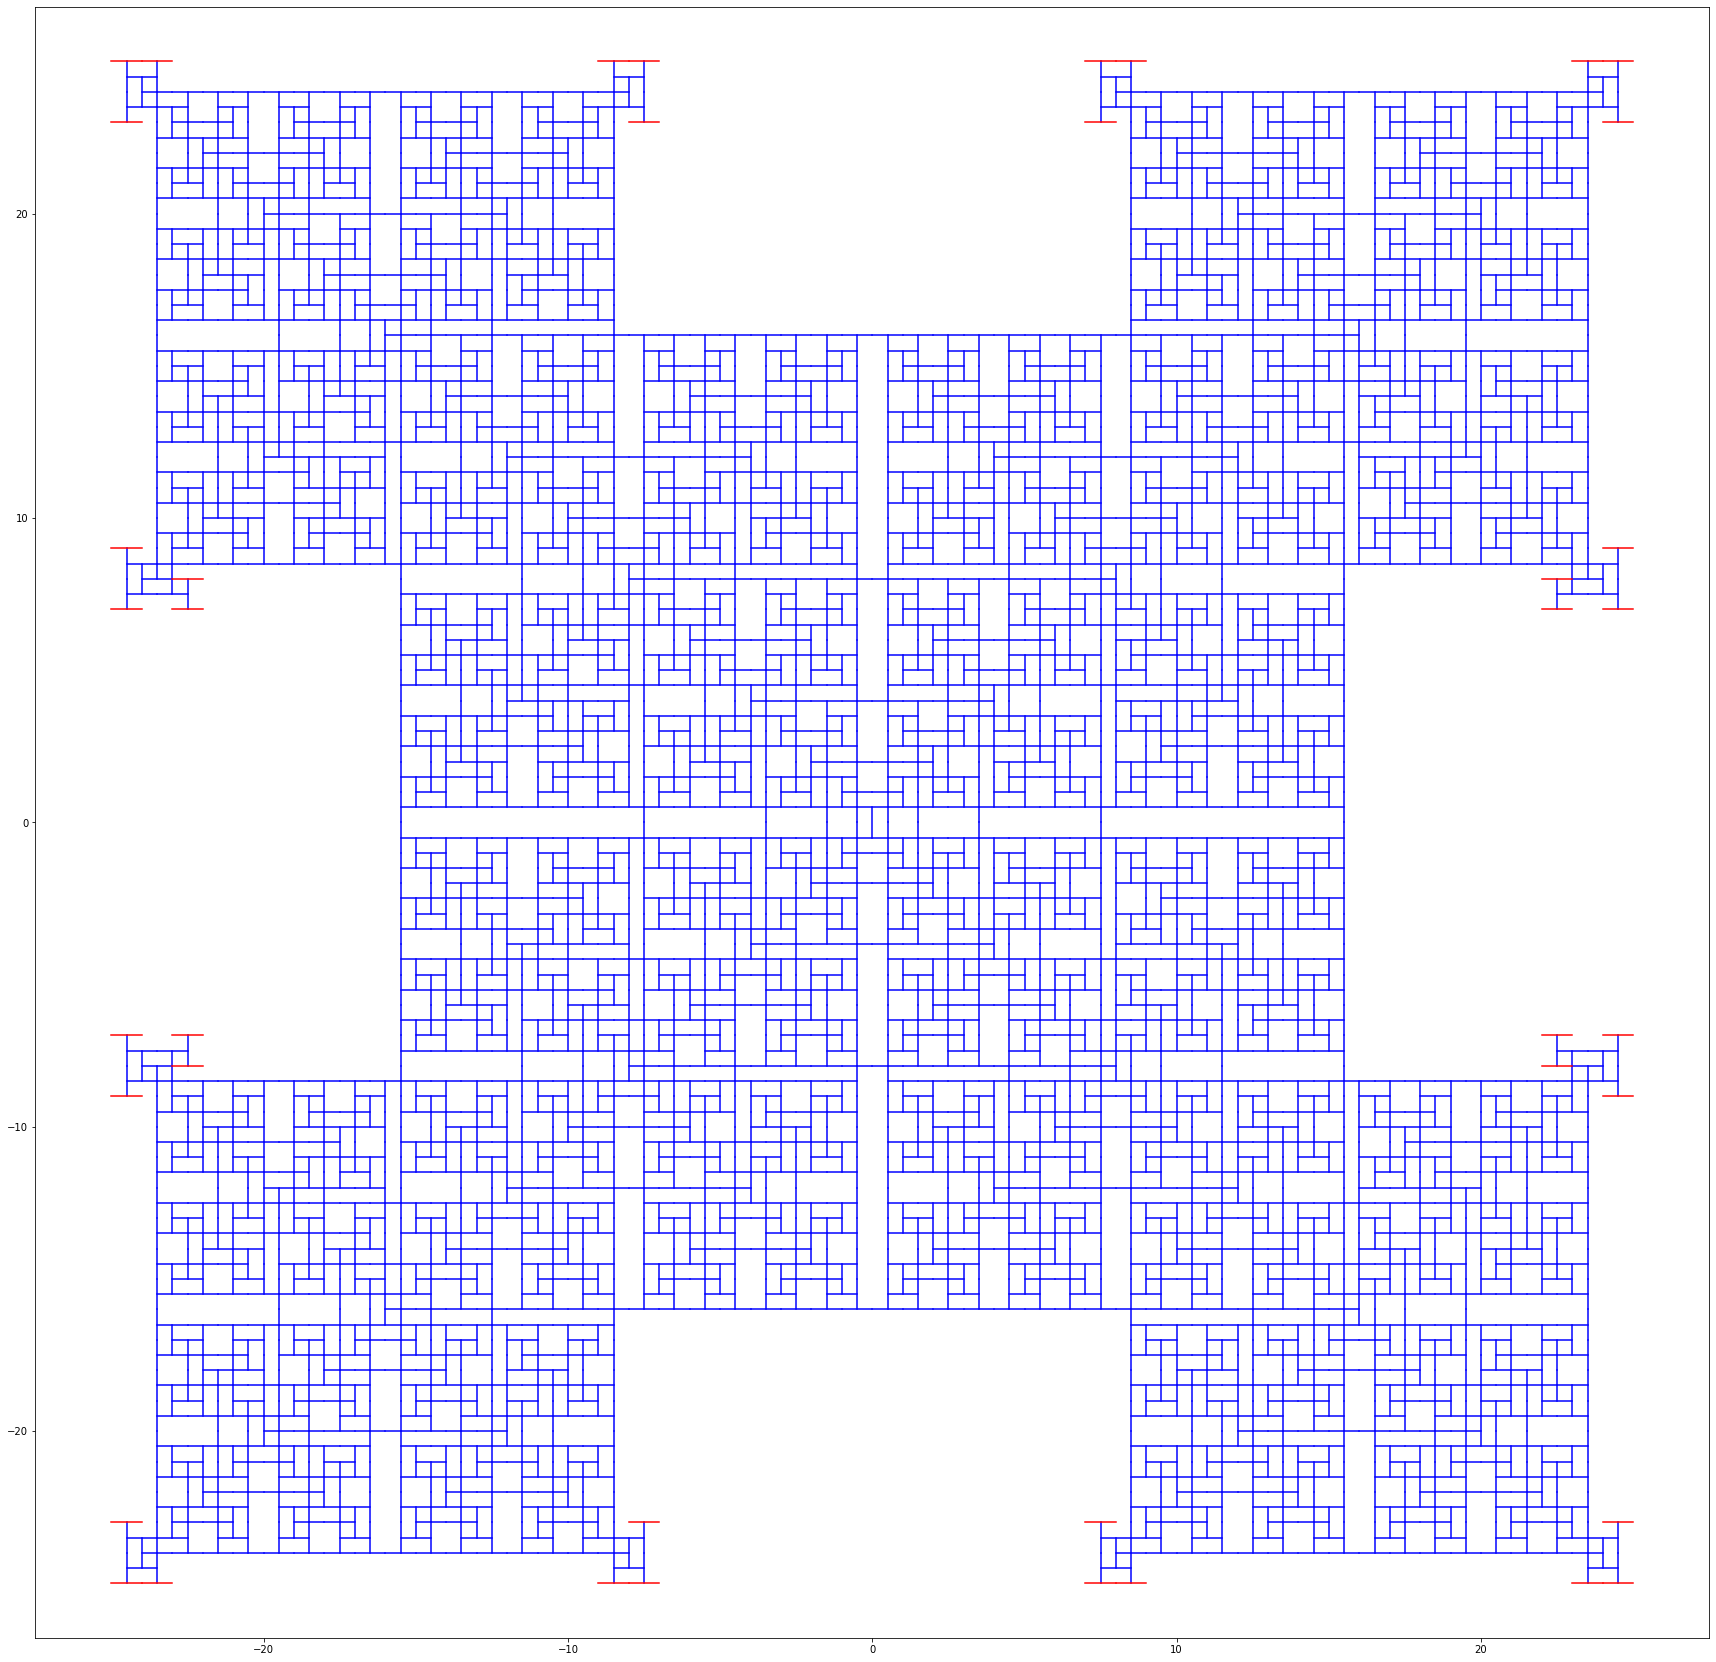

In [4]:

l=1  #duljina čačkalice
N=100 #broj generacija
i=1
xc=[]   #x koordinate čačkalica
yc=[]   #y koordinate čačkalica
xy1=[]  #Skup vrhova svih Čačkalica zadnje generacije
xy2=np.array([[0,0]]) #Vrhovi čaćkalice na kojima se nastavlja crtanje
xysvi=[]  #Skup vrhova svih Čačkalica



plt.rcParams['figure.figsize'] = [30,30] 

def duplikati(): ######## Pazi da ne crta čaćkalice iz vrhova koji se dodiruju
    
    xy1=[]
    for i in range (len(xc)):
        xy1.append((xc[i],yc[i]))
        xysvi.append((xc[i],yc[i]))
        
        
    df = pd.DataFrame(xy1)
    xy2=df.drop_duplicates(keep=False).to_numpy()
    
    b= np.concatenate((xy2, xysvi))
    df2=pd.DataFrame(b)
    c=df2.drop_duplicates(keep=False).to_numpy()
    
    d=np.concatenate((c, xysvi))
    df3=pd.DataFrame(d)
    xy2=df3.drop_duplicates(keep=False).to_numpy()
    
    return xy2   

while(i<N):
    
    
    
    ####horizontalne
    if (i%2==0):
        xc=[]
        yc=[]
        
       
        for j in range (len(xy2)):
        
            plt.plot([xy2[j][0]-l/2,xy2[j][0]+l/2],[xy2[j][1],xy2[j][1]],color='blue')
            ###### vrhovi
            xc.extend((xy2[j][0]-l/2,xy2[j][0]+l/2))         
            yc.extend((xy2[j][1],xy2[j][1]))
               
           
        
        
     ######vertikalne    
    else:
        xc=[]
        yc=[]
        
        
        for j in range (len(xy2)):
            
            plt.plot([xy2[j][0],xy2[j][0]],[xy2[j][1]-l/2,xy2[j][1]+l/2],color='blue')
            ###### vrhovi
            xc.extend((xy2[j][0],xy2[j][0]))         
            yc.extend((xy2[j][1]-l/2,xy2[j][1]+l/2))
       
       
      
        
            
    xy2=duplikati()
    
    i+=1

    
############   Crta zadnje čačkalice 
if(N%2==0):
    for j in range (len(xy2)):
        
            plt.plot([xy2[j][0]-l/2,xy2[j][0]+l/2],[xy2[j][1],xy2[j][1]],color='red')
else:
    
    for j in range (len(xy2)):
            plt.plot([xy2[j][0],xy2[j][0]],[xy2[j][1]-l/2,xy2[j][1]+l/2],color='red')    
###########            
            
            
plt.axis('equal')#Skalira x i y os   
print()

Parna generacija crta horizontalne čačkalice, a neparna generacija crta vertikalne čačkalice. Nacrta se jedna čačkalica, uzmu se (x,y) koordinate njenih vrhova koji će biti središte novih čačkalica. Iz središta se crta pola duljine u jednom smjeru i pola duljine u drugom smjeru, crta li se vertikalno (y-os) ili horizontalno (x-os) ovisi o generaciji. Postupak se ponavlja za svaki novi vrh. U slučaju da se crtanjem dva vrha dodirnu, ti vrhovi neće biti središte nove čačkalice. Brisanje vrhova koji se dodiruju se postiže pomoću $panda$ biblioteke koju koristi funkcija $duplikati$. Funkcija duplikati uzima listu koordinata svih vrhova generacije koja je upravo nacrtana, uspoređuje sa svim vrhovima koji su do tad nacrtani i briše sve duplikate u listi, gdje ne ostavlja jedan od duplikata. Postoji dodatna lista koja sadrži koordinate svih vrhova no ako se nalazimo iznad generacije $2^n$ sve koordinate do $2^{n-1}$ generacije se mogu izbrisati iz memorije, npr. ako prelazimo u generacije nakon $2^4$ mogu se brisati koordinate svih generacija do $2^3$. Postavljen je zadnji uvjet koji crta zadnje čačkalice crvenom bojom.